# Perceptron

In [1]:
import numpy as np

In [2]:
class Perceptron:
    def __init__(self, inputs, targets, eta, epochs, random_state=None):
        self.inputs = inputs
        self.targets = targets
        self.eta = eta
        self.epochs = epochs
        if random_state:
            np.random.seed(random_state)
        self.progress = []
        return
    
    @staticmethod
    def _forward(inputs, weights):
        signal = np.dot(inputs, weights)
        return np.where(signal > 0, 1, 0)
    
    def train(self):
        """
        """
        # Ensure target data is 2D
        if self.targets.ndim == 1:
            self.targets = self.targets.reshape((-1, 1))
            
        # Initilize weights to small numbers
        weights = np.random.rand(self.inputs.shape[1] + 1, self.targets.shape[1]) * 0.1 - 0.05
        bias = -np.ones((self.inputs.shape[0], 1))
        inputs_with_bias = np.hstack((self.inputs, bias))
        # print("DEBUG:: Inputs with bias: {}".format(inputs_with_bias))
        # print("DEBUG:: Targets: {}".format(self.targets))
        
        for i in range(self.epochs):
            outputs = self._forward(inputs_with_bias, weights)
            print("DEBUG:: Outputs: {}".format(outputs.reshape((1, -1))))
            weights -= self.eta * np.dot(inputs_with_bias.T, outputs - self.targets)
            self.progress.append(outputs)

In [3]:
or_network = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])

In [4]:
or_network[:, :2]

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [5]:
p = Perceptron(or_network[:, :2], or_network[:, 2], eta=0.25, epochs=10, random_state=42)

In [6]:
p.train()

DEBUG:: Outputs: [[0 1 0 1]]
DEBUG:: Outputs: [[1 1 1 1]]
DEBUG:: Outputs: [[0 1 1 1]]
DEBUG:: Outputs: [[0 1 1 1]]
DEBUG:: Outputs: [[0 1 1 1]]
DEBUG:: Outputs: [[0 1 1 1]]
DEBUG:: Outputs: [[0 1 1 1]]
DEBUG:: Outputs: [[0 1 1 1]]
DEBUG:: Outputs: [[0 1 1 1]]
DEBUG:: Outputs: [[0 1 1 1]]


## Linear Regression

In [7]:
def linear_regression(X, y):
    if y.ndim == 1:
        y = y.reshape((-1, 1))

    X = np.hstack((X, -np.ones((X.shape[0], 1))))
    beta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
    
    return np.dot(beta, inputs.T)

In [8]:
# def linear_regression_2(x, y):
#     X = np.matrix(np.vstack([x, -np.ones(len(x))]).T)
#     beta = np.linalg.inv(X.T * X) * X.T * np.matrix(y).T
#     
#     return beta * x

# Multilayer Perceptron

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()
%matplotlib inline

np.random.seed(42)

In [10]:
X = np.linspace(0, 1, 40)
y = np.sin(2 * np.pi * X) + np.cos(4 * np.pi * X) + np.random.randn(40) * 0.2

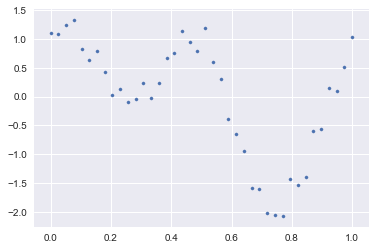

In [11]:
plt.scatter(X, y, s=10)

In [12]:
from sklearn.model_selection import train_test_split
from scipy.special import expit

In [13]:
class MLP:
    def __init__(self, inputs, targets, num_hidden, beta=1, momentum=0.9,
                 activation="logistic", random_state=None):
        """
        """
        self.inputs = inputs
        if targets.ndim == 1:
            targets = targets.reshape((-1, 1))
        self.targets = targets
        self.num_input = inputs.shape[1]
        self.num_output = targets.shape[1]
        self.num_hidden = num_hidden
        self.w1, self.w2 = self._initialize_weights()
        self.beta = beta
        self.momentum = momentum
        self.activation = activation
        if random_state:
            np.random.seed(random_state)

    def _initialize_weights(self):
        """Initialize weights with small random numbers
        """
        w1 = (np.random.rand(self.num_input + 1, self.num_hidden) - 0.5) * 2\
            / np.sqrt(self.num_input)  # add 1 for bias node
        w2 = (np.random.rand(self.num_hidden + 1, self.num_output) - 0.5) * 2\
            / np.sqrt(self.num_hidden)
        return w1, w2

    def _add_bias_node(self, inputs):
        return np.hstack((inputs, -np.ones((inputs.shape[0], 1))))

    def early_stopping(self, valid_inputs, valid_targets, eta, epochs=100):

        valid_inputs = self._add_bias_node(valid_inputs)
        if valid_targets.ndim == 1:
            valid_targets = valid_targets.reshape((-1, 1))

        best_valid_error = 100001
        valid_error = 100000

        cnt = 0
        while best_valid_error - valid_error > 1e-3:
            cnt += 1
            print("==> Validation iteration count: {}".format(cnt))
            self.train(eta, epochs)
            # best_train_error = self.error_[-1]
            best_valid_error = valid_error
            valid_outputs = self._forward(valid_inputs, self.w1, self.w2)
            valid_error = ((valid_targets - valid_outputs) ** 2).sum() / 2.0
            print("    Validation error: {}".format(valid_error))

    def train(self, eta, epochs):

        self.error_ = []
        delta_w1 = np.zeros(self.w1.shape)
        delta_w2 = np.zeros(self.w2.shape)

        inputs = self._add_bias_node(self.inputs)

        for i in range(epochs):
            outputs = self._forward(inputs, self.w1, self.w2)
            error = ((outputs - self.targets) ** 2).sum() / 2.0
            self.error_.append(error)

            if i % 100 == 0:
                print("    Iteration {:3d}: error = {}".format(i, error))

            if self.activation == "linear":
                output_deltas = (outputs - self.targets) / self.inputs.shape[0]
            elif self.activation == "logistic":
                output_deltas = self.beta\
                    * (outputs - self.targets) * outputs * (1.0 - outputs)
            # elif self.activation == "softmax":
            #     output_deltas =
            
            hidden_deltas = self.hidden_outputs * self.beta * (1.0 - self.hidden_outputs)\
                * (np.dot(output_deltas, self.w2.T))

            delta_w1 = eta * (np.dot(inputs.T, hidden_deltas[:, :-1]))\
                + self.momentum * delta_w1
            delta_w2 = eta * (np.dot(self.hidden_outputs.T, output_deltas))\
                + self.momentum * delta_w2
            
            self.w1 -= delta_w1
            self.w2 -= delta_w2

    def _forward(self, inputs, w1, w2):
        """Feed forward
        """
        # inputs = self._add_bias_node(inputs)
        z = self.beta * np.dot(inputs, w1)
        self.hidden_outputs = np.hstack((self._sigmoid(z), -np.ones((inputs.shape[0], 1))))
        outputs = np.dot(self.hidden_outputs, w2)
        if self.activation == "linear":
            outputs = outputs
        elif self.activation == "logistic":
            outputs = self._sigmoid(self.beta * outputs)
        # elif self.activation == "softmax":
        #     # normalizer = 
        #     return
        # else:
        #     print("WARNING:: Error")

        return outputs

    def _sigmoid(self, z):
        return expit(z)

### Training example 1

In [14]:
X = np.linspace(0, 1, 40)
y = np.sin(2 * np.pi * X) + np.cos(4 * np.pi * X) + np.random.randn(40) * 0.2

In [15]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 42)
# X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size = 0.5, random_state = 42)
# X_train = X_train.reshape((-1, 1))
# X_valid = X_valid.reshape((-1, 1))

In [16]:
train = X.reshape((-1, 1))[0::2, :]
valid = X.reshape((-1, 1))[3::4, :]
y_train = y.reshape((-1, 1))[0::2, :]
y_valid = y.reshape((-1, 1))[3::4, :]
# print(y_valid)

In [17]:
nn = MLP(train, y_train, 3, activation="linear")

In [18]:
nn.early_stopping(valid, y_valid, 0.1, epochs=200)

==> Validation iteration count: 1
    Iteration   0: error = 11.1367455831
    Iteration 100: error = 6.47886278063
    Validation error: 3.56079984533
==> Validation iteration count: 2
    Iteration   0: error = 6.44770207553
    Iteration 100: error = 6.43419561644
    Validation error: 3.52292181586
==> Validation iteration count: 3
    Iteration   0: error = 6.42339370117
    Iteration 100: error = 6.41419086565
    Validation error: 3.50721443455
==> Validation iteration count: 4
    Iteration   0: error = 6.40331254795
    Iteration 100: error = 6.39199513239
    Validation error: 3.49472285627
==> Validation iteration count: 5
    Iteration   0: error = 6.37729213147
    Iteration 100: error = 6.36102881588
    Validation error: 3.47801262542
==> Validation iteration count: 6
    Iteration   0: error = 6.33889958879
    Iteration 100: error = 6.31352946122
    Validation error: 3.45109922358
==> Validation iteration count: 7
    Iteration   0: error = 6.27826551333
    Iteration

### Classification with The Iris Dataset

In [19]:
from sklearn import datasets

In [20]:
iris = datasets.load_iris()

In [21]:
X = iris.data
y = iris.target

### One-hot encoding of target variable

In [22]:
y_encoded = np.zeros((iris.target.shape[0], 3))

In [23]:
y_encoded[np.where(y == 0), 0] = 1
y_encoded[np.where(y == 1), 1] = 1
y_encoded[np.where(y == 2), 2] = 1

In [24]:
train, y_train = X[::2, 0:4], y_encoded[::2]
valid, y_valid = X[1::4, 0:4], y_encoded[1::4]

## Testing

In [25]:
nn2 = MLP(train, y_train, 5, activation="logistic")

In [26]:
nn2.early_stopping(valid, y_valid, 0.1)

==> Validation iteration count: 1
    Iteration   0: error = 26.63155071
    Validation error: 6.25246340301
==> Validation iteration count: 2
    Iteration   0: error = 12.5006592543
    Validation error: 6.25007222402
==> Validation iteration count: 3
    Iteration   0: error = 12.5001465858
    Validation error: 6.25007199645
